# Image Deblurring - June Exam

## Progetto apprendimento automatico Federico Piozzi N.Matricola 0000978589


### Dataset creation - DO NOT MODIFY

In [11]:
import tensorflow as tf
import random
from cv2 import GaussianBlur
import numpy as np

def getDataset():
  (x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
  normalize = lambda x: x/x.max()
  x_train = normalize(x_train)
  x_test = normalize(x_test)
  createBlurred = lambda arr: np.array([GaussianBlur(x, (5,5), ((random.random()*3)+1)) + (0.02*np.random.normal(0,1, (32, 32, 3))) for x in arr])
  return (createBlurred(x_train), x_train), (createBlurred(x_test), x_test)

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, BatchNormalization, Flatten, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow import keras

In [13]:
(x_train_val,y_train_val),(x_test,y_test) = getDataset()

print(x_train_val.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [14]:
# Separazione del dataset di addestramento in dataset di addestramento ridotto (40000 immagini) e dataset di valutazione (10000 immagini)
x_train = x_train_val[:40000]
y_train = y_train_val[:40000]

x_val = x_train_val[40000:]
y_val = y_train_val[40000:]

In [15]:
import matplotlib.pyplot as plt

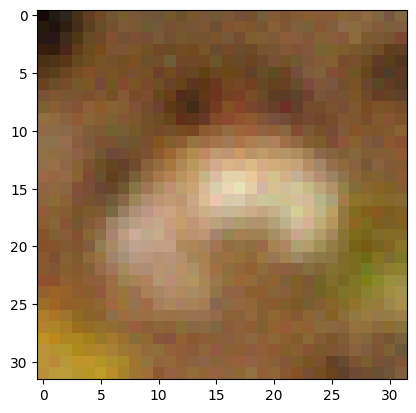

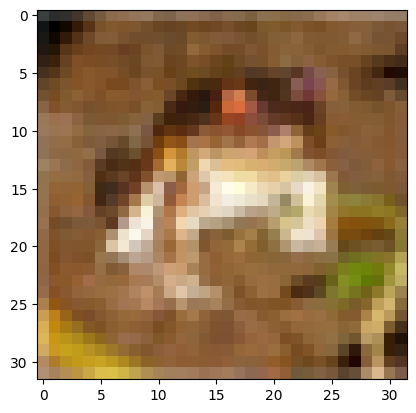

In [ ]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(y_train[0])
plt.show()

In [16]:
# Creazione del modello
inputs = Input(shape=(32,32,3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

# Decoder
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

# L'ultima convoluzione restituisce l'immagine in output con 3 canali di colore
outputs = Conv2DTranspose(3, (3, 3), activation='linear', padding='same')(x)

model = Model(inputs, outputs)

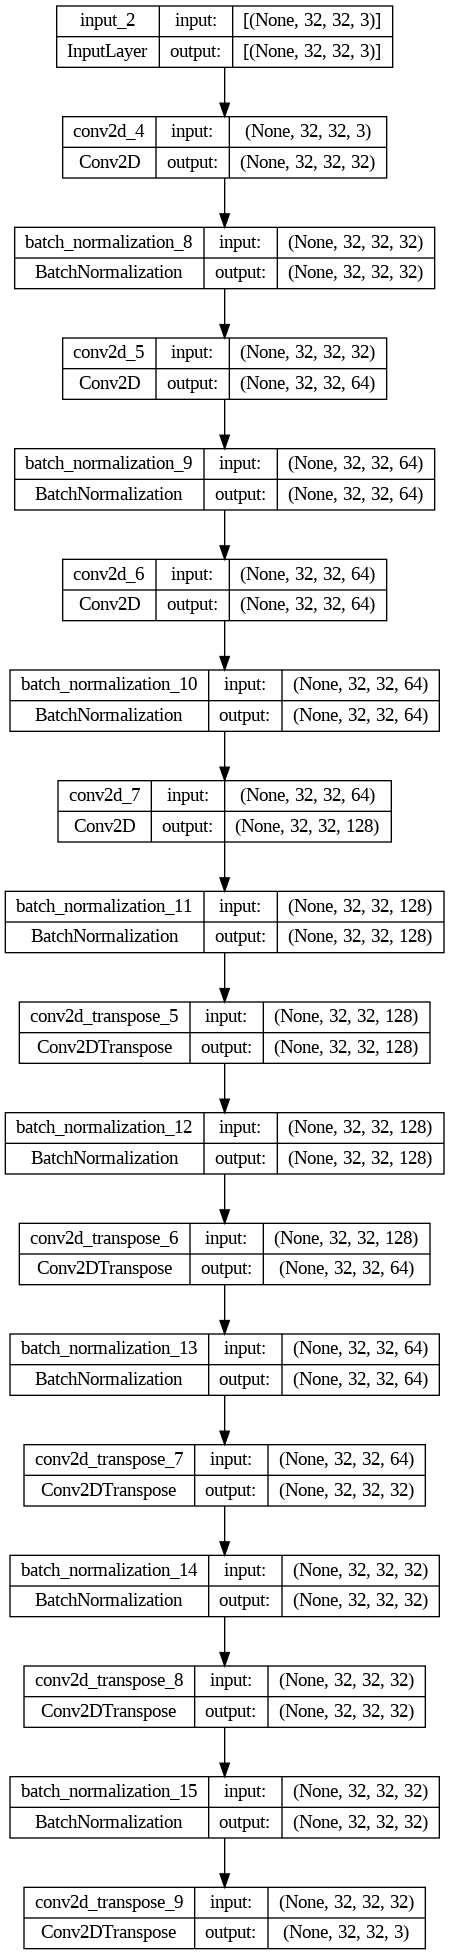

In [17]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3692

In [19]:
model.compile(
    optimizer='adam',
    loss=MeanSquaredError(),
    metrics=['mse']
)

In [20]:
# Addestramento del modello
history = model.fit(
    x_train,
    y_train,
    batch_size=125,
    epochs=150,
    validation_data=(x_val, y_val)
  )

Epoch 1/150
320/320 [==============================] - 43s 81ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 2/150
320/320 [==============================] - 27s 84ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3/150
320/320 [==============================] - 26s 83ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 4/150
320/320 [==============================] - 26s 81ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 5/150
320/320 [==============================] - 27s 84ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 6/150
320/320 [==============================] - 26s 82ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7/150
320/320 [==============================] - 26s 82ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 8/150
320/320 [==============================] - 

In [21]:
model.save('trained_models/Federico_Piozzi')

# Salvataggio dei pesi del modello
model.save_weights('trained_models/Federico_Piozzi/weights')

model.load_weights('trained_models/Federico_Piozzi/weights')

In [22]:
# Valutazione del modello utilizzando il dataset di valutazione
mse = model.evaluate(x_test, y_test)
print(f"Mean Squared Error: {mse}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0024 - mse: 0.0024
Mean Squared Error: [0.00240416475571692, 0.00240416475571692]


1/1 [==============================] - 0s 466ms/step


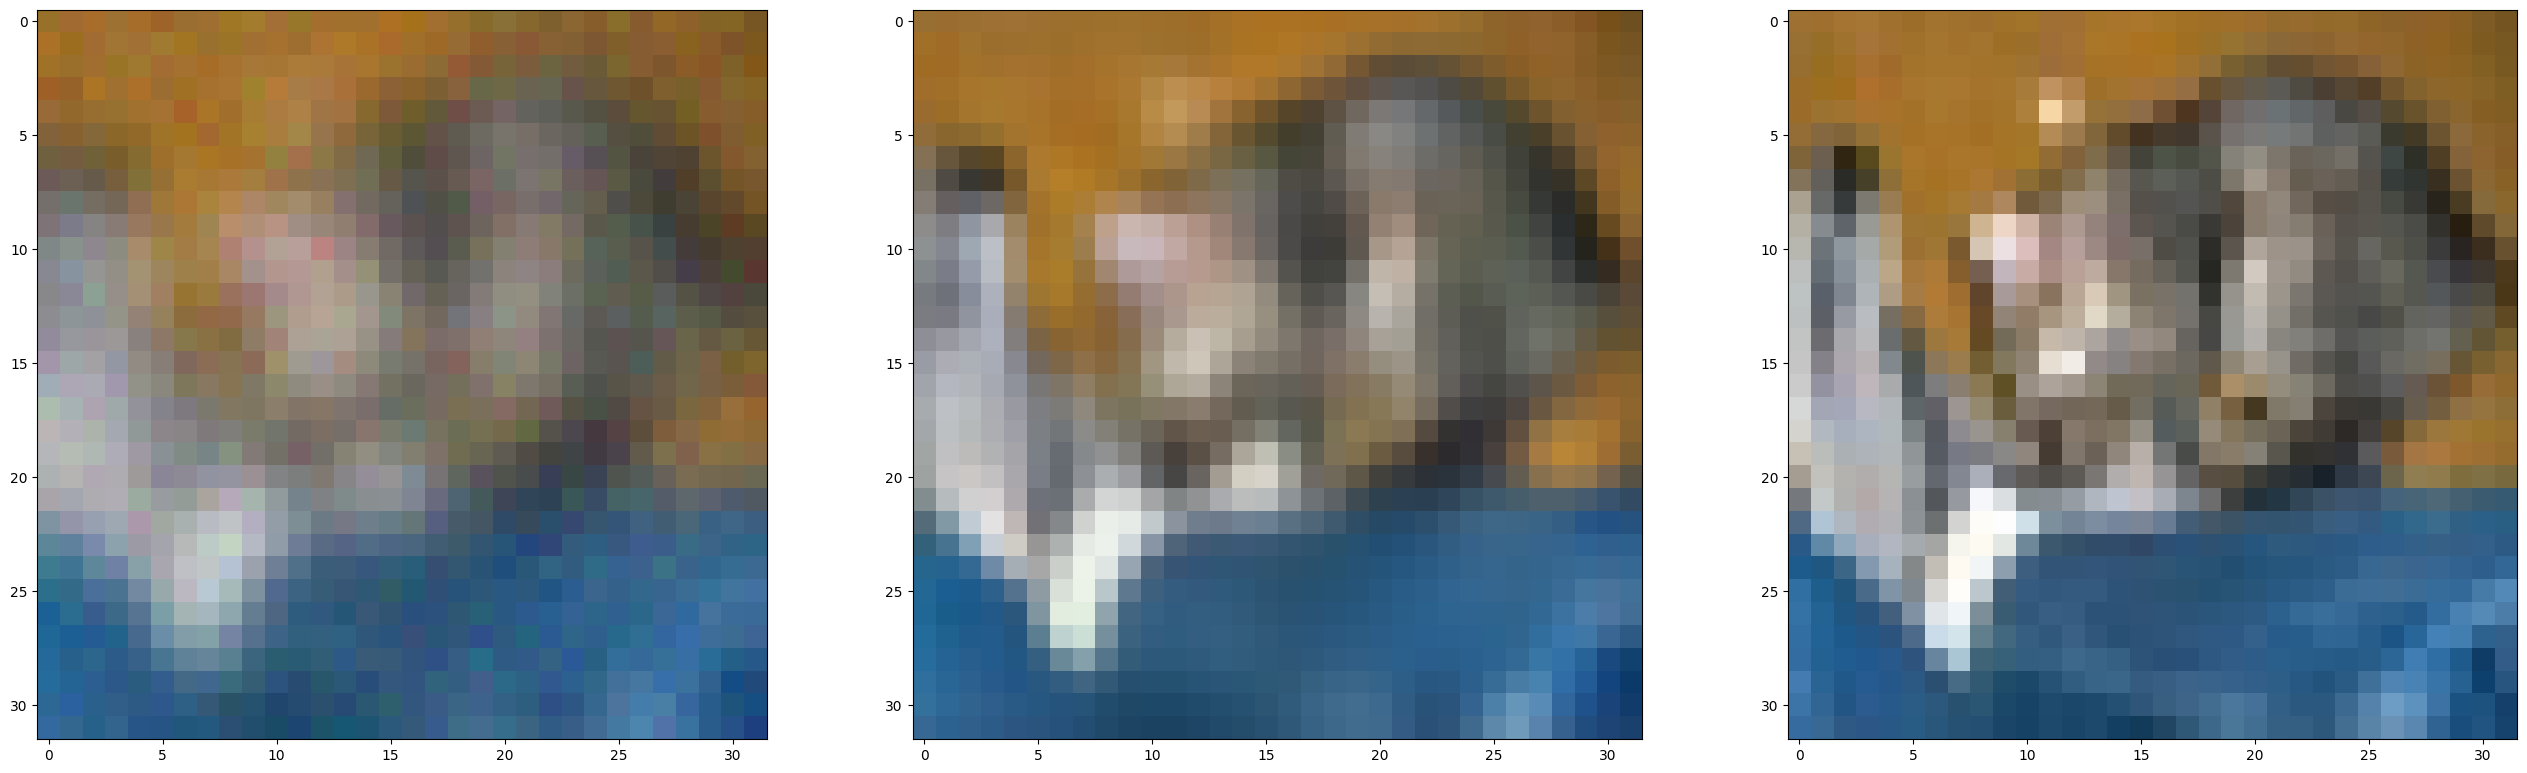

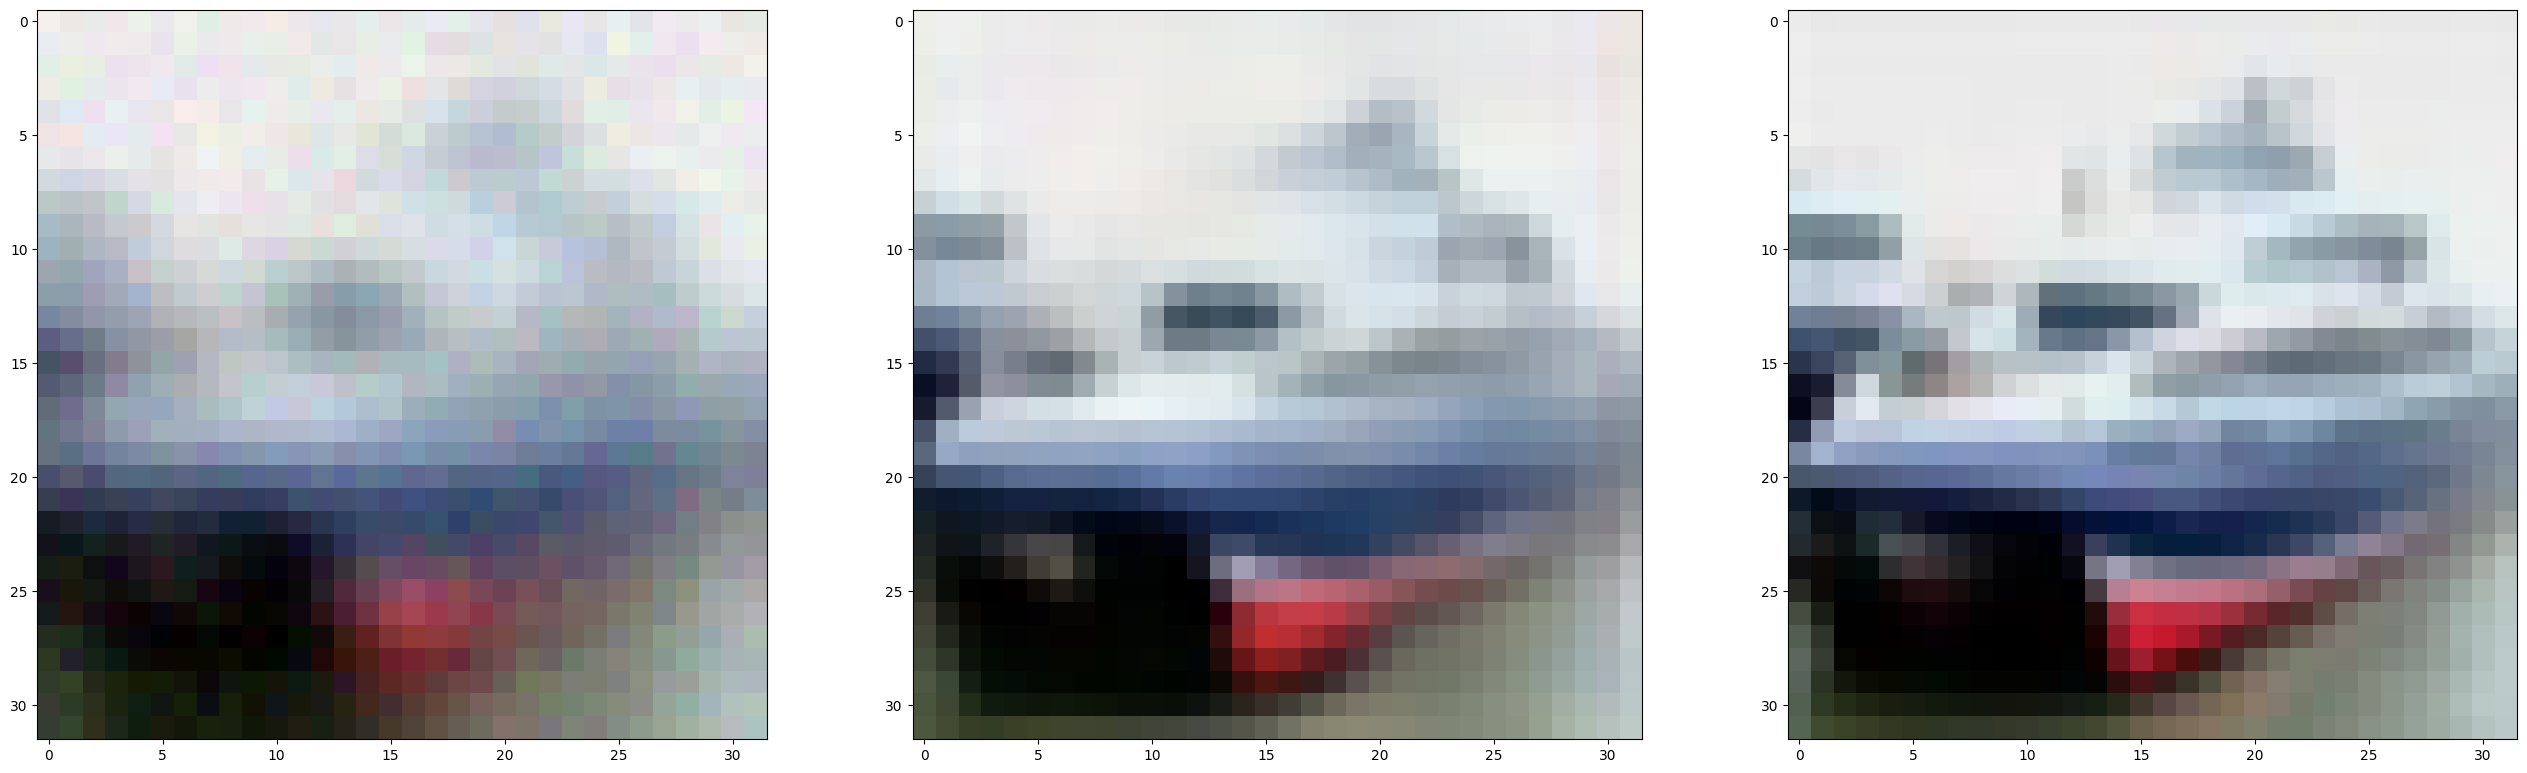

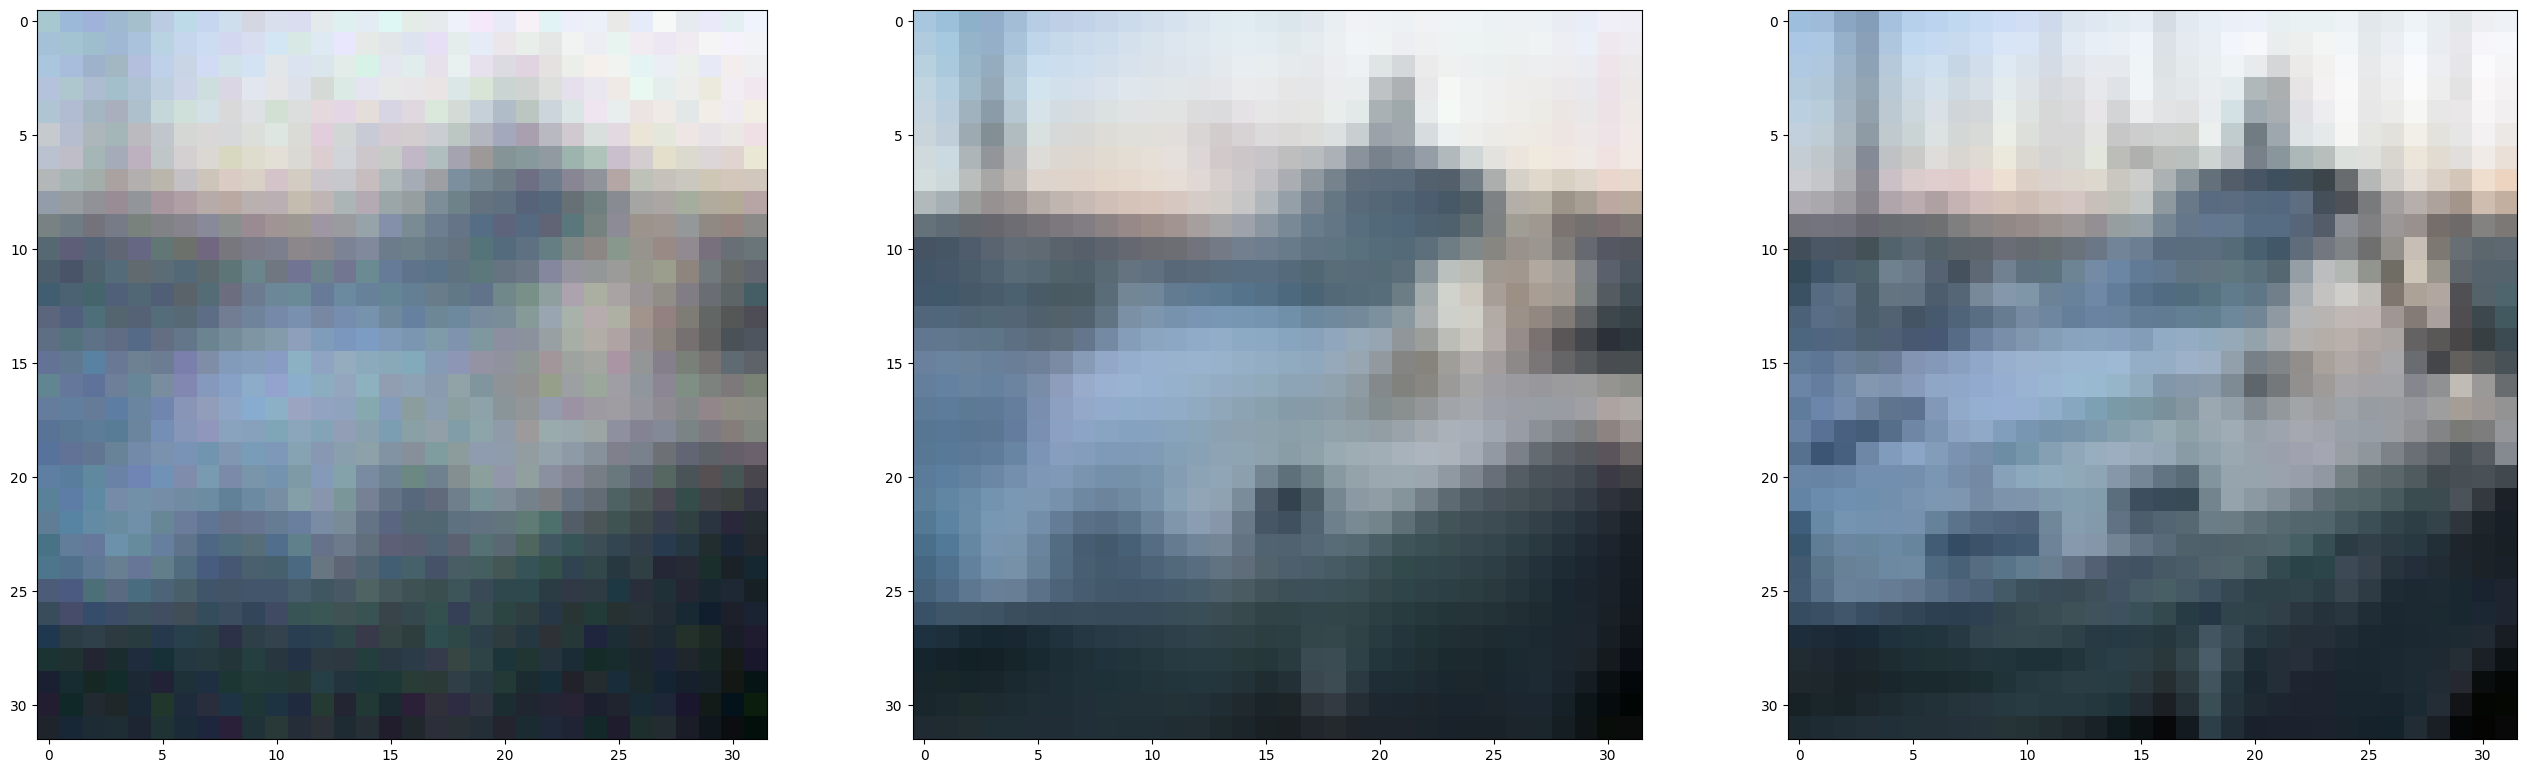

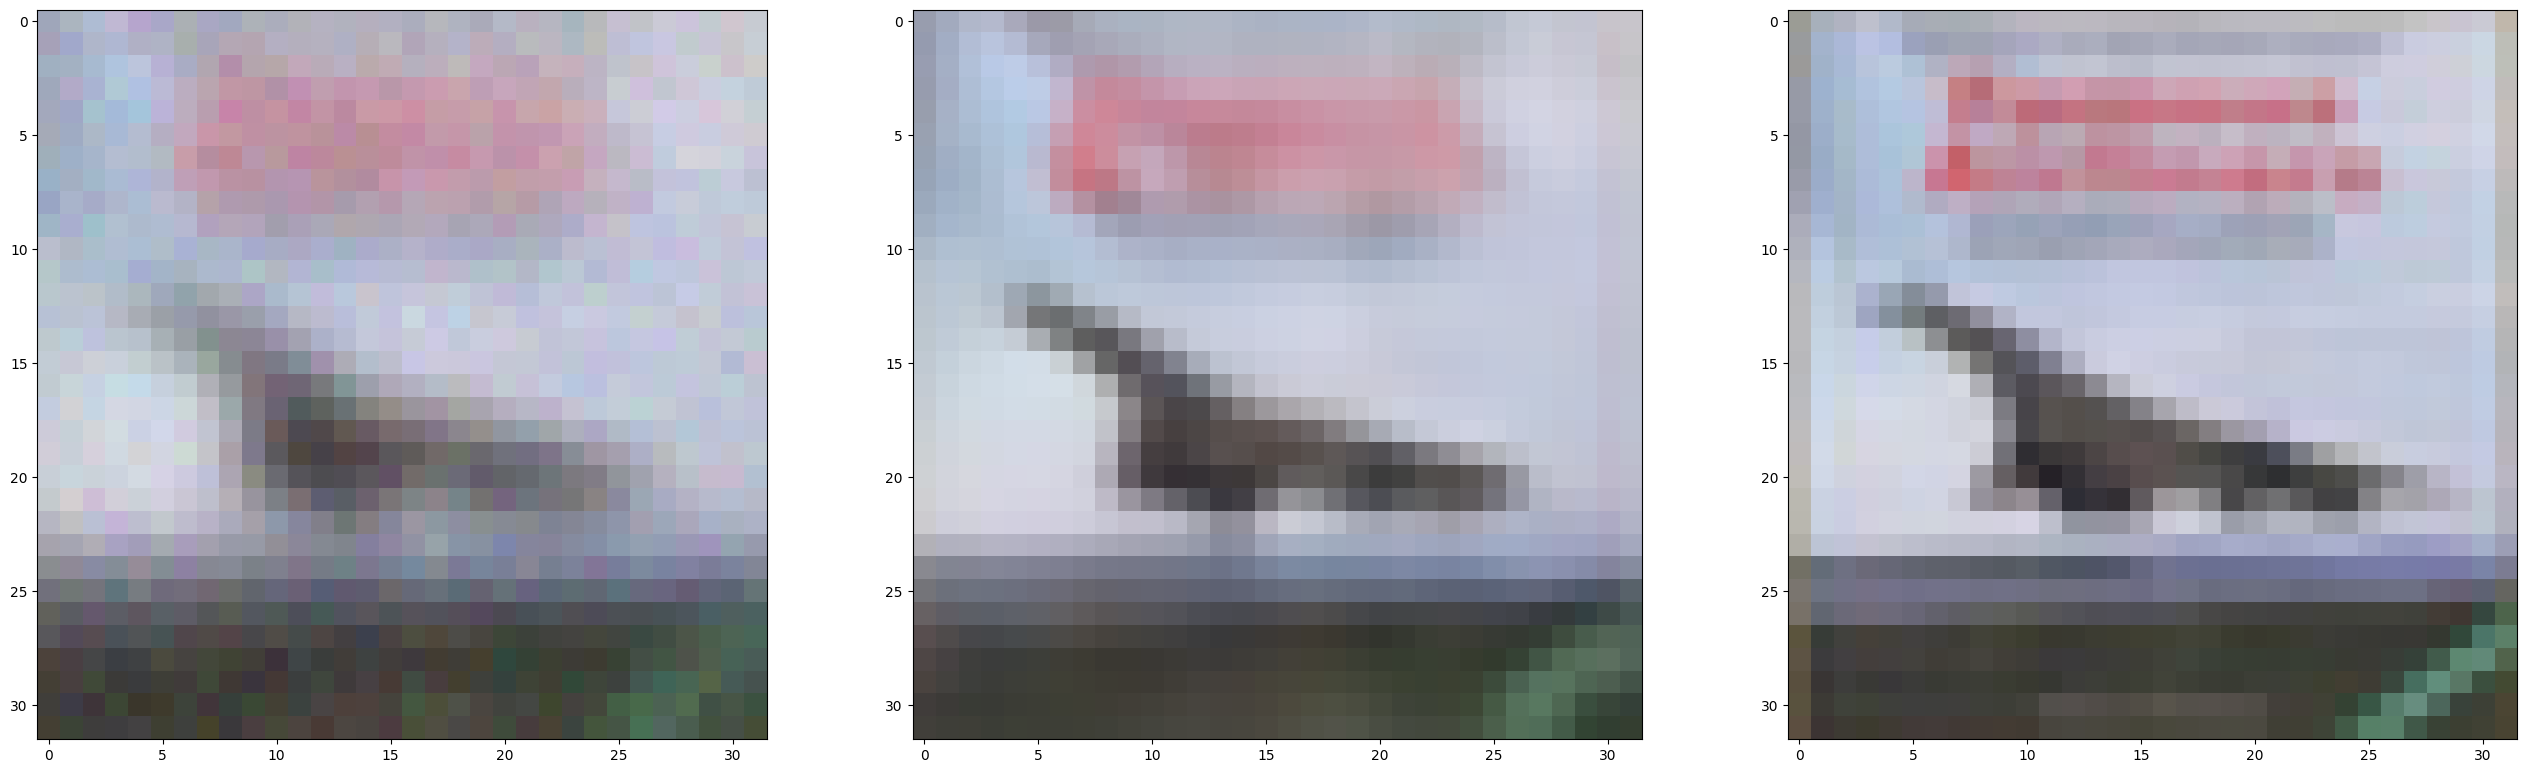

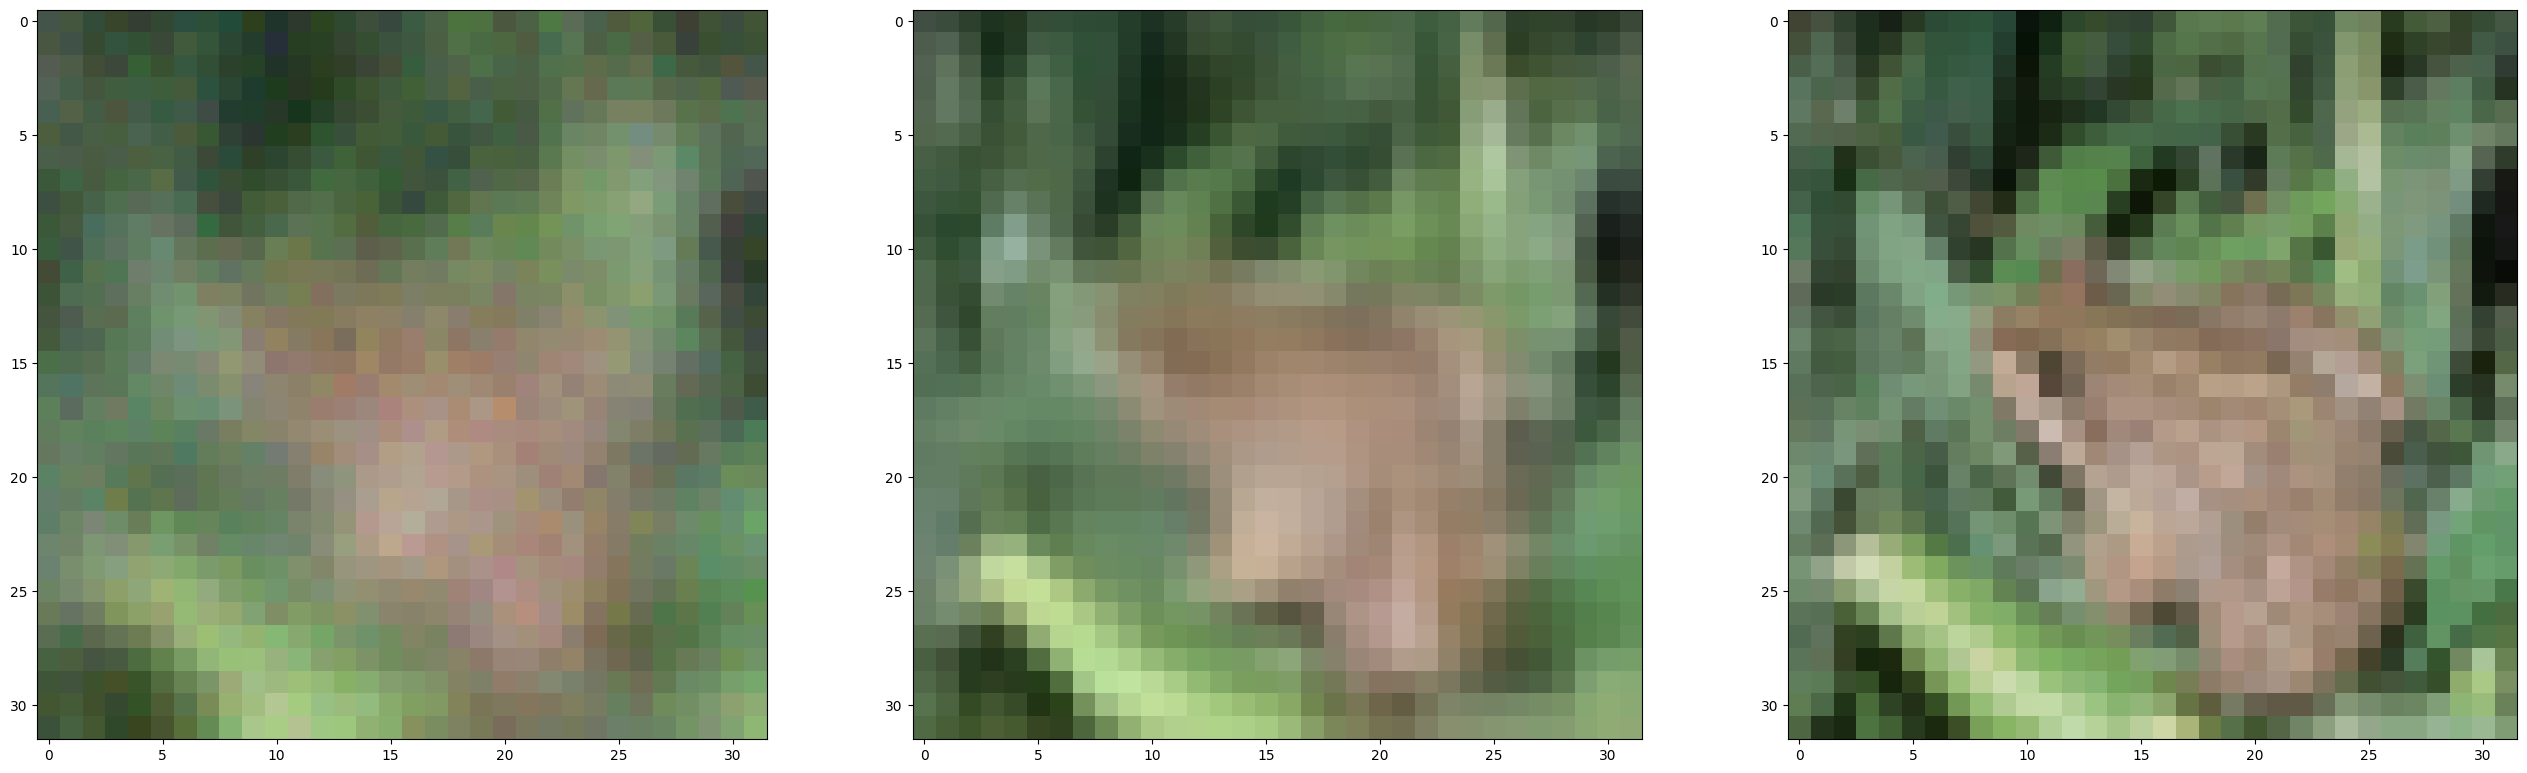

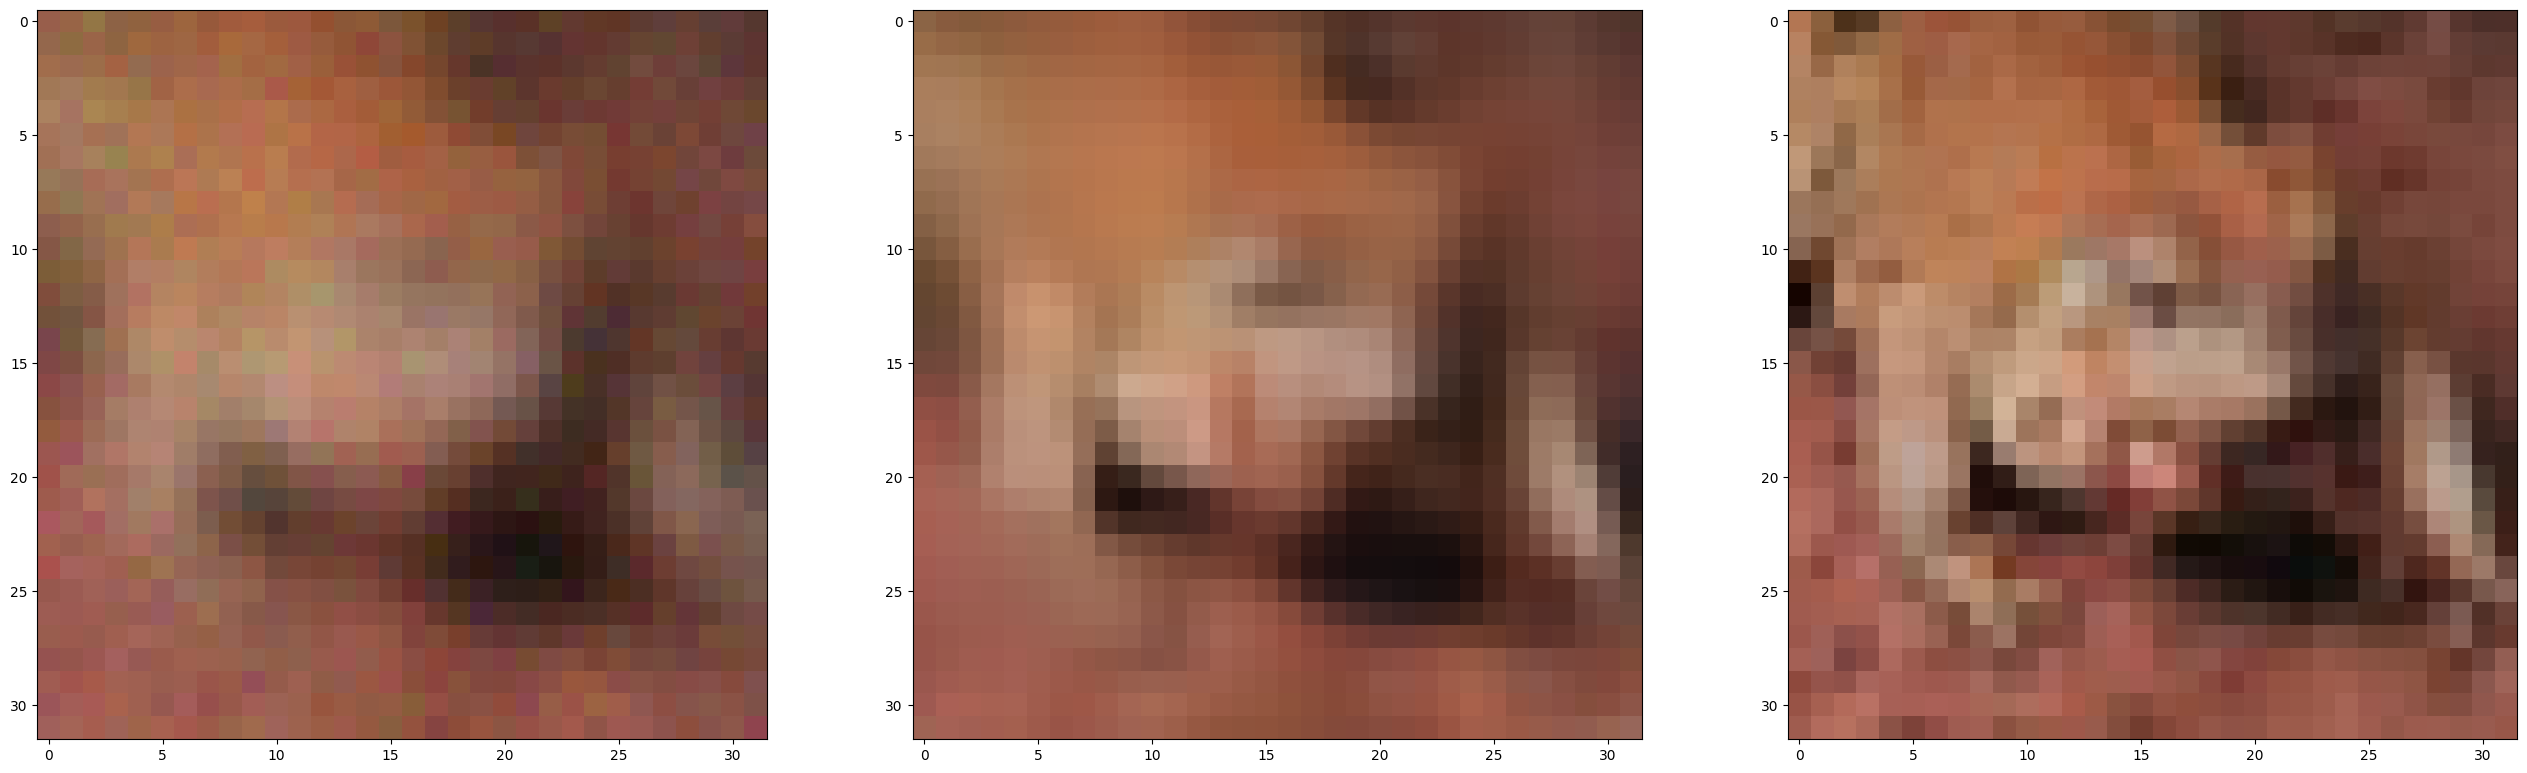

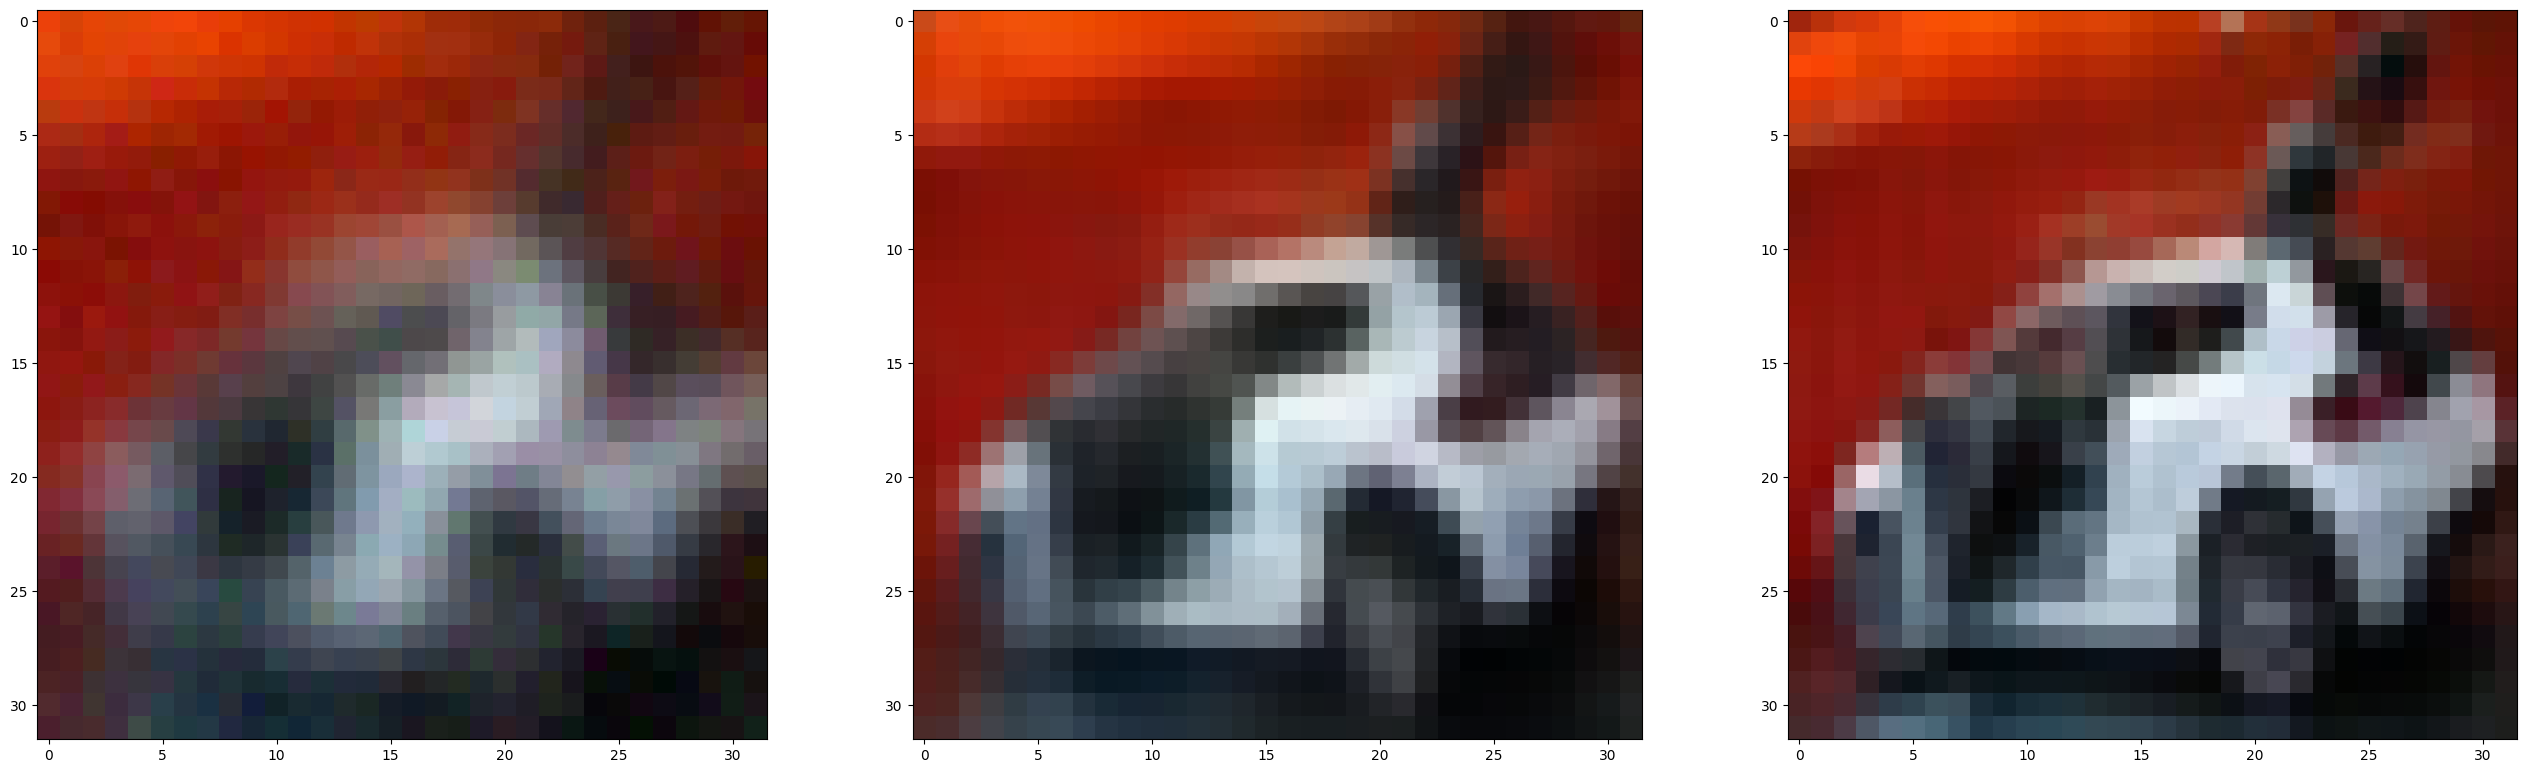

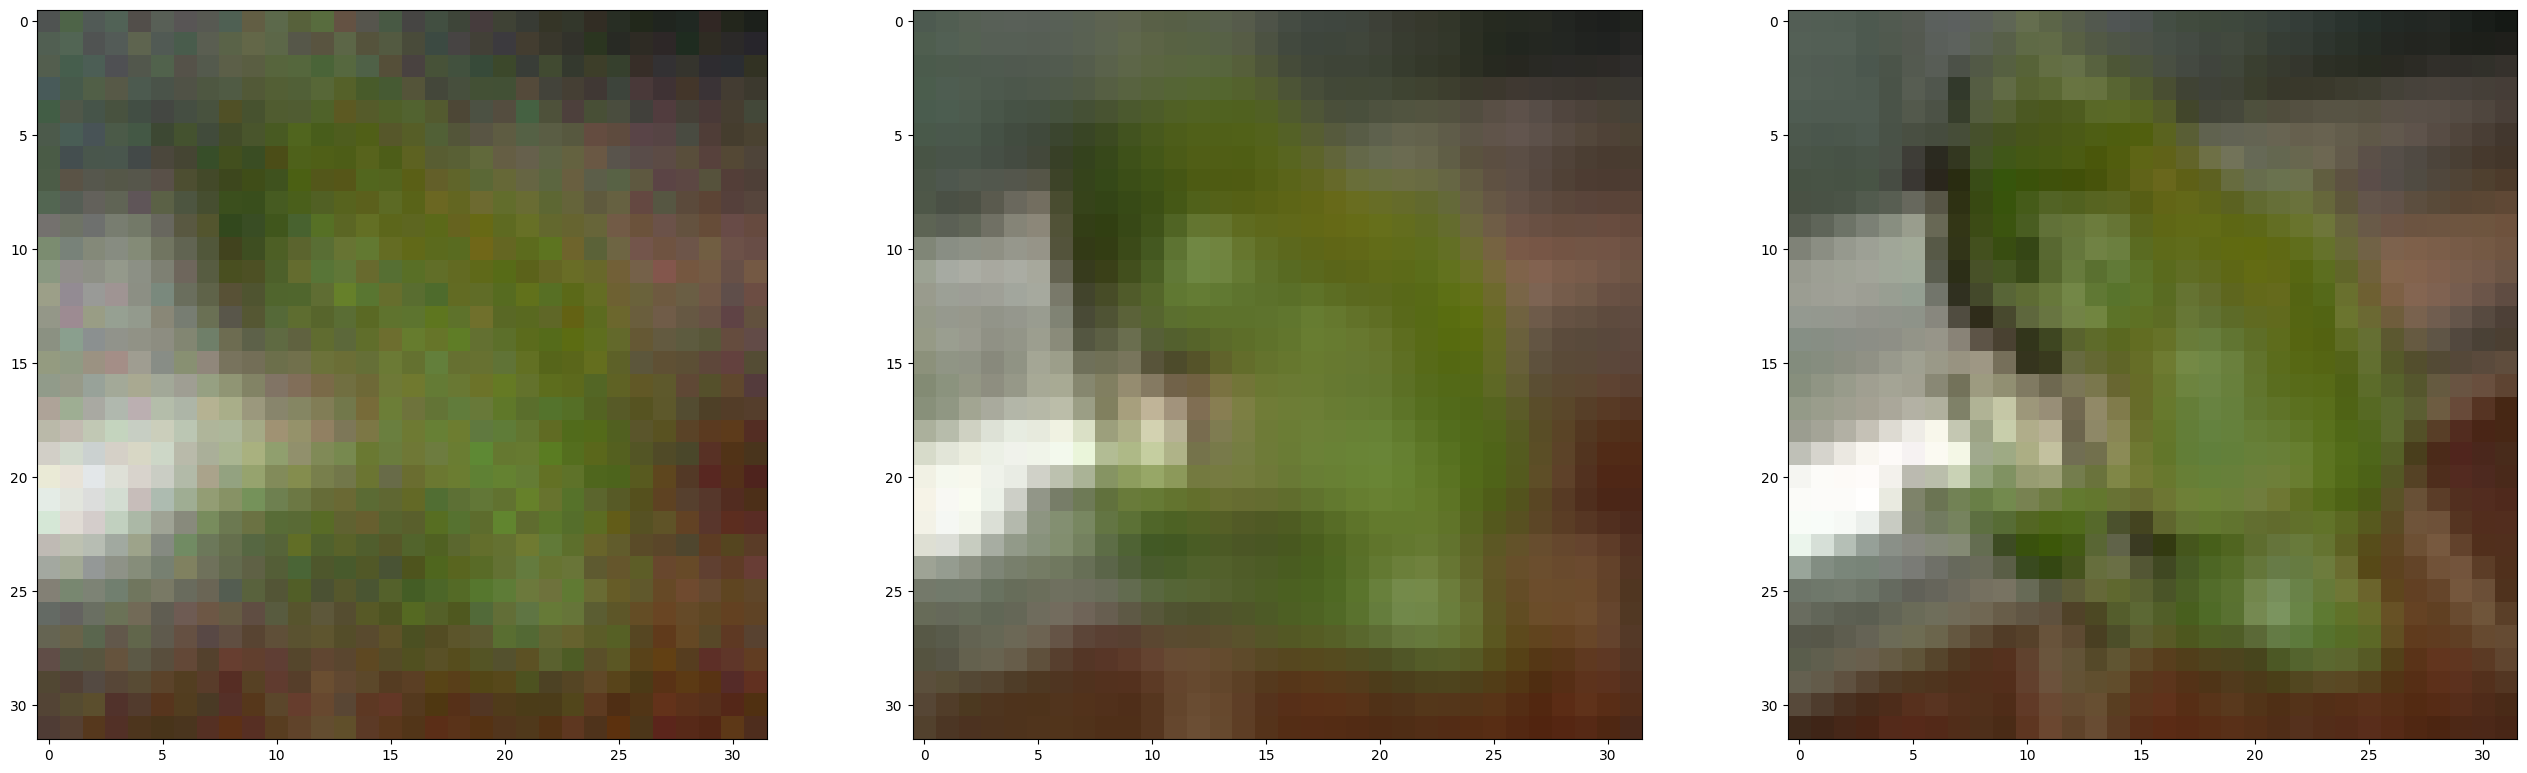

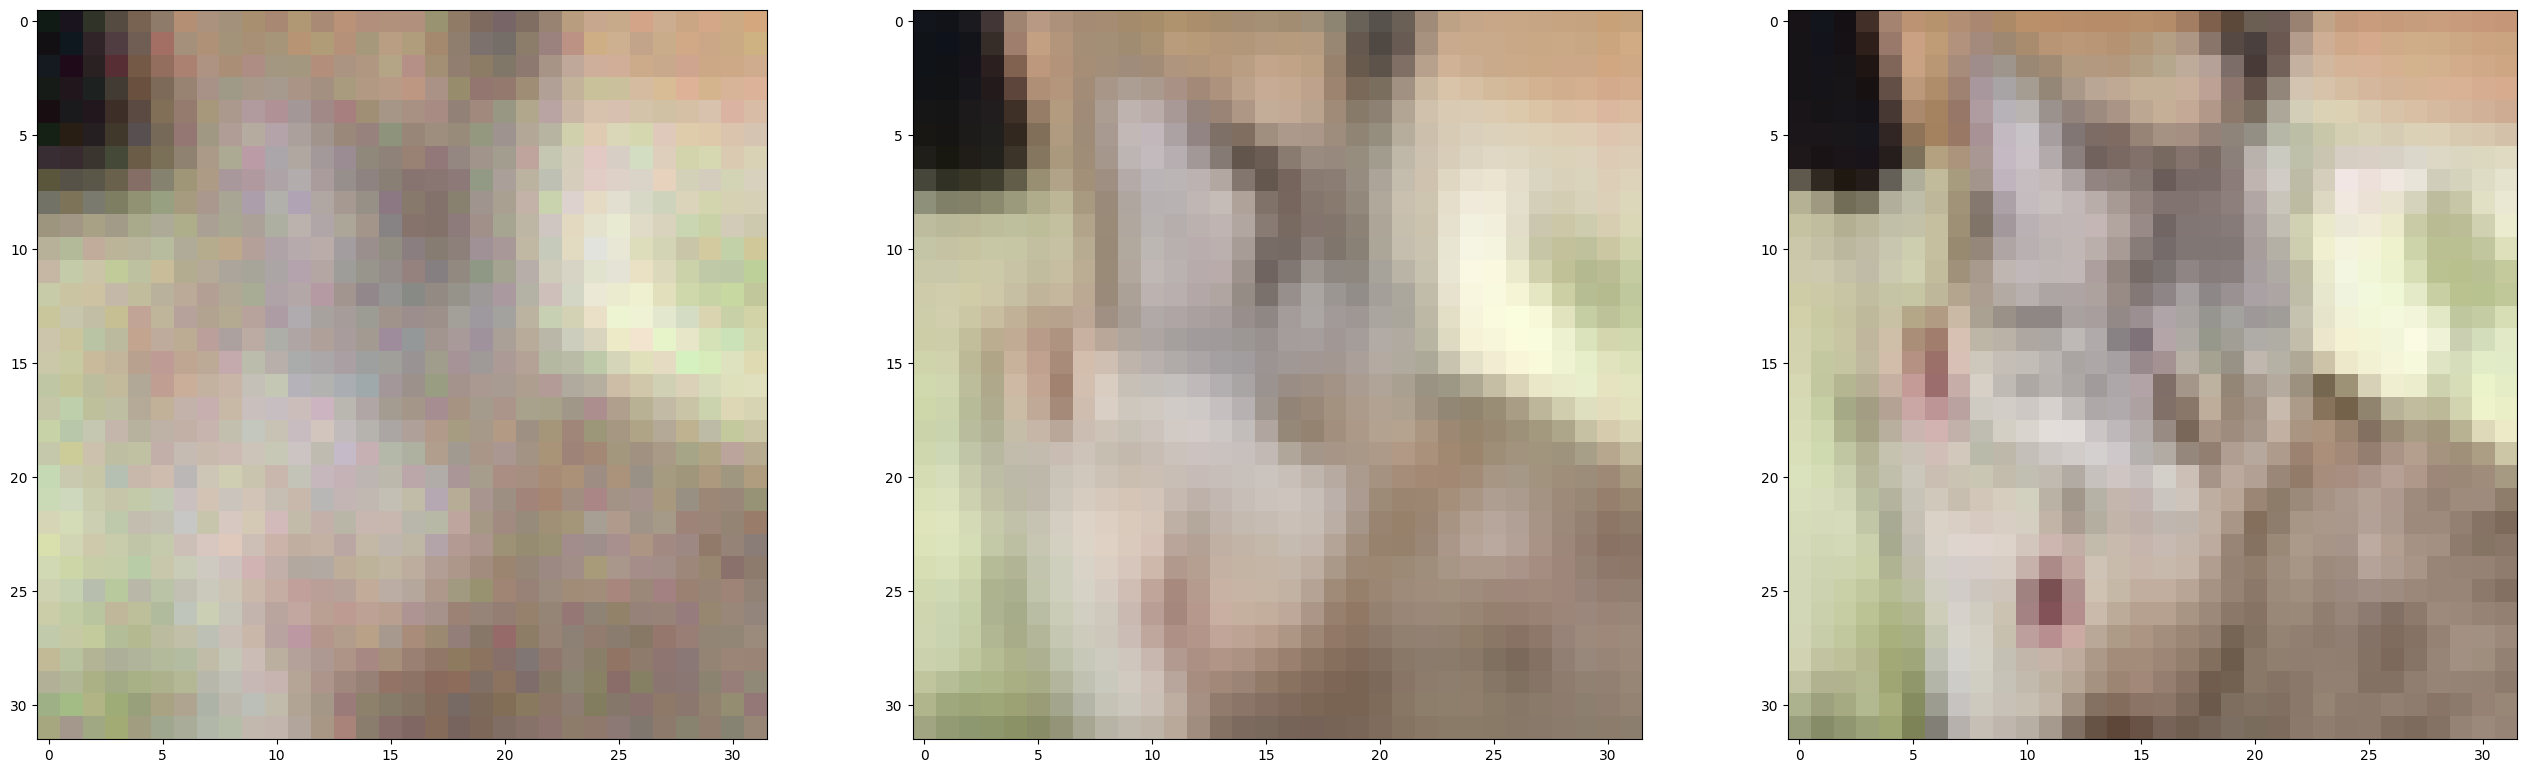

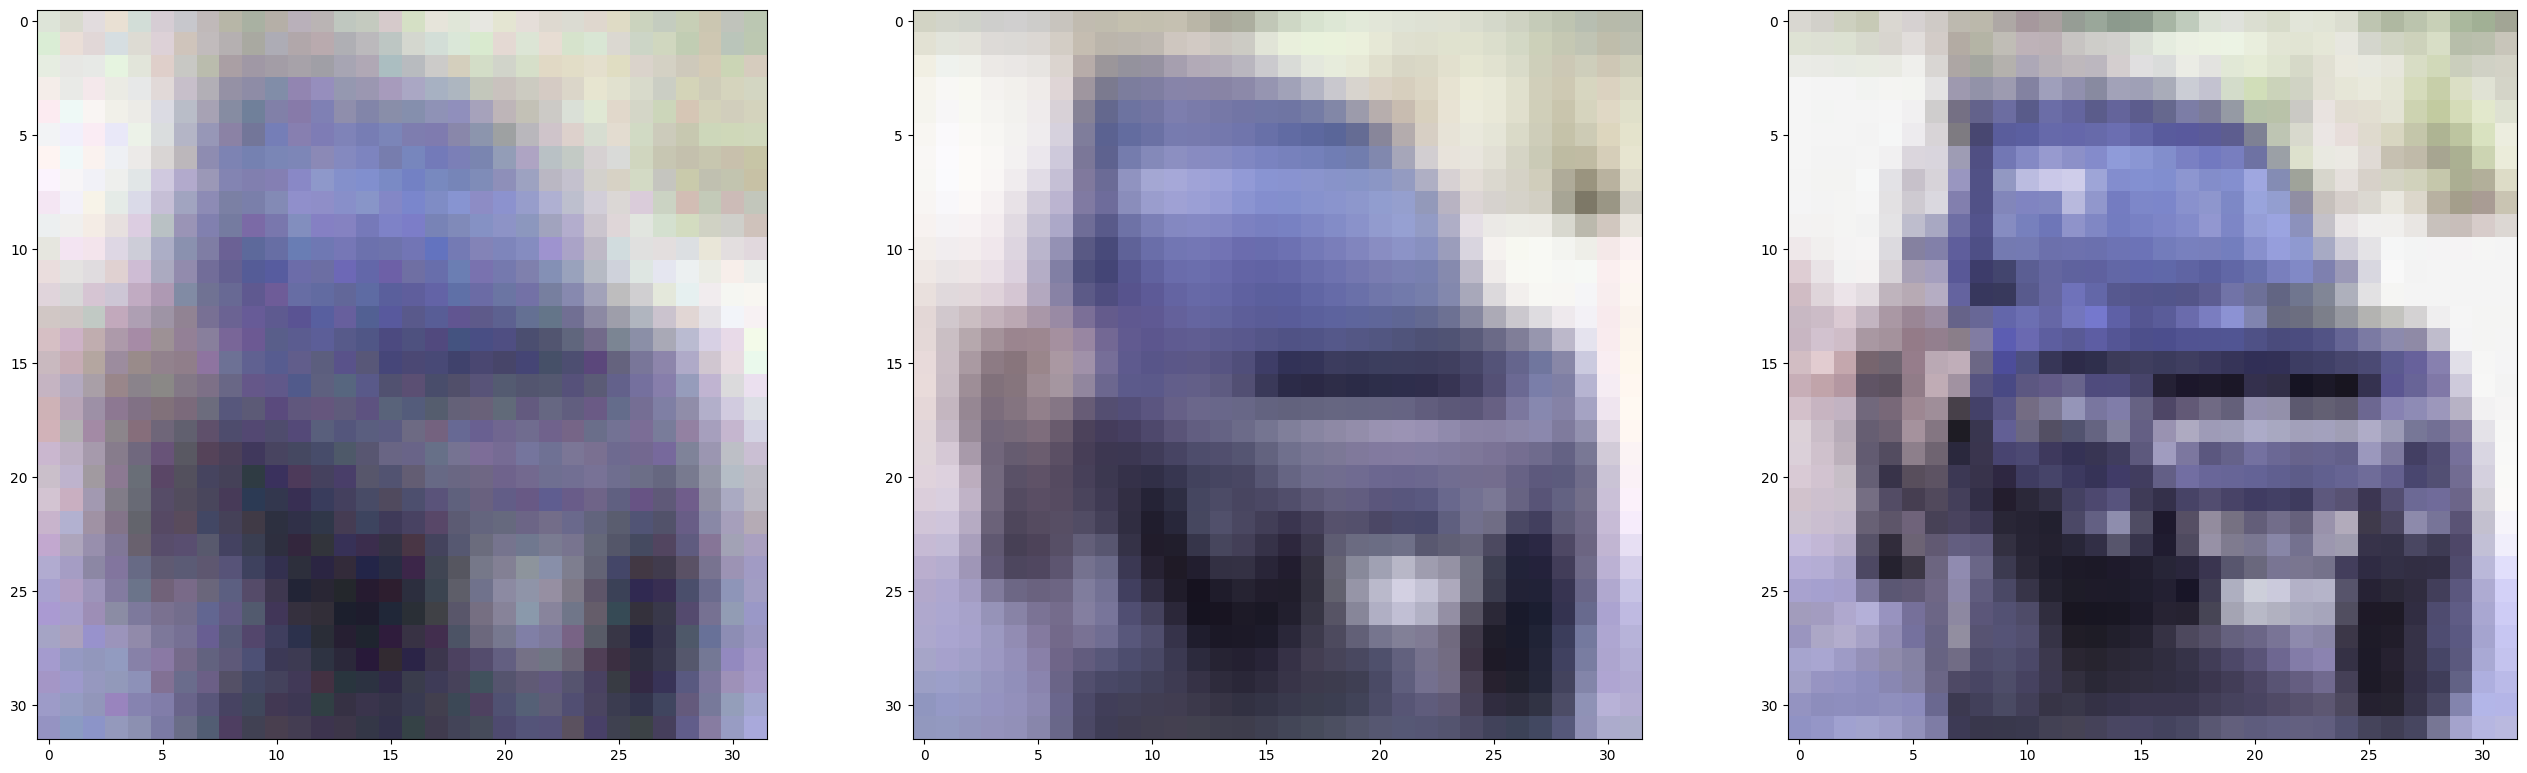

In [23]:
# Esempi di resa del modello
n_examples = 10
y_test_examples = model.predict(x_test[:n_examples])
for i in range(n_examples):
  fig = plt.figure(figsize=(32, 32))
  fig.add_subplot(1, 3, 1)
  plt.imshow(x_test[i])
  fig.add_subplot(1, 3, 2)
  plt.imshow(y_test_examples[i])
  fig.add_subplot(1, 3, 3)
  plt.imshow(y_test[i])
  plt.show()

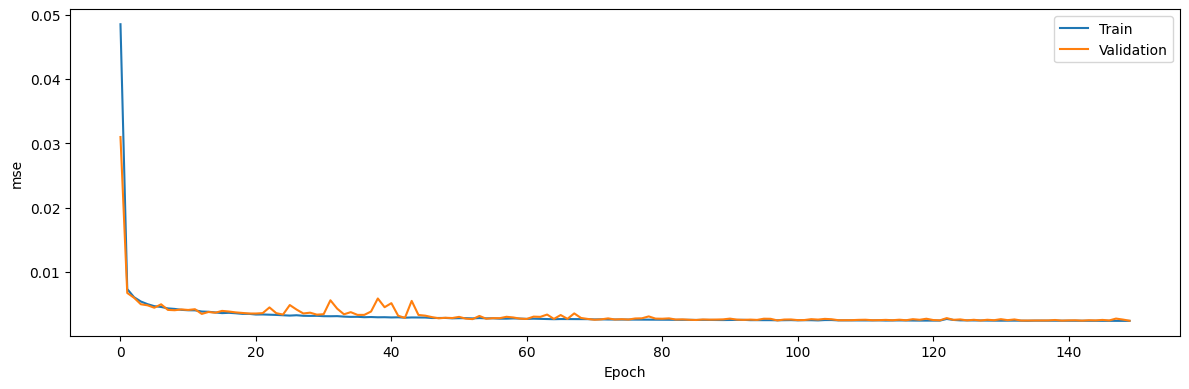

In [36]:
#Grafici mse train e validation per controllo overfitting
#NOTA: Il modello è stato allenato complessivamente su 150 epoche

fig, g = plt.subplots(1, 1, figsize=(12, 4))


g.plot(history.history['mse'], label='Train')
g.plot(history.history['val_mse'], label='Validation')
g.set_xlabel('Epoch')
g.set_ylabel('mse')
g.legend()


plt.tight_layout()
plt.show()